In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
haberman_data = pd.read_csv( 'datasets_474_966_haberman.csv',header = None)

In [11]:
haberman_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [46]:
columns = ['age','op_yr','ax','status']
haberman_data = pd.read_csv('datasets_474_966_haberman.csv',header = None,names=columns)

In [47]:
haberman_data

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [48]:
haberman_data.shape

(306, 4)

In [49]:
haberman_data.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [50]:
haberman_data['status'] = np.where(haberman_data['status']==1,'Survived','Not_survived')

In [88]:
survived = (225/len(haberman_data['status'])*100)
not_survived = (81/len(haberman_data['status'])*100)
print("The percentage of patient that survived the surgery",str(round(survived,2))+'%')
print("The percentage of patient that didn't survive the surgery",str(round(not_survived,2))+'%')



The percentage of patient that survived the surgery 73.53%
The percentage of patient that didn't survive the surgery 26.47%


More than half of the Percentage of People Survived the Surgery after 5years 

In [89]:
haberman_data.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


The maximum Age of the Patient that partook in the surgery is 83, while the minimum age is 30, with an average age of 53

Text(0.5, 0, 'Age of Patient')

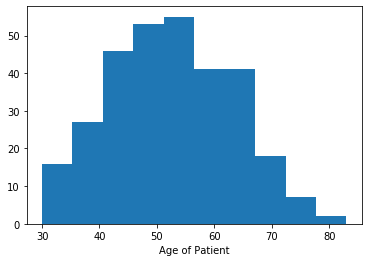

In [53]:
haberman_data['age'].hist(grid=False)
plt.xlabel('Age of Patient')

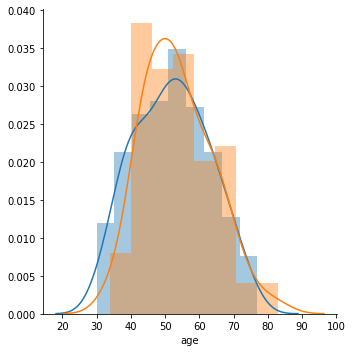

In [90]:
sns.FacetGrid(haberman_data,hue='status',height=5,legend_out=True).map(sns.distplot,'age')


Text(0.5, 0, 'Year of Operation')

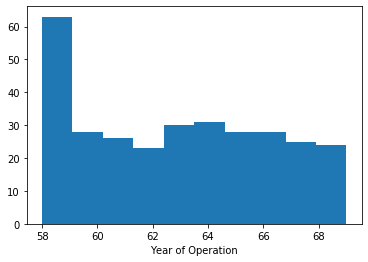

In [56]:
haberman_data['op_yr'].hist(grid=False)
plt.xlabel('Year of Operation')

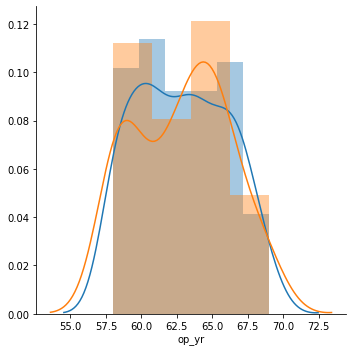

In [59]:
sns.FacetGrid(haberman_data,hue='status',height=5,legend_out=True).map(sns.distplot,'op_yr')


Text(0.5, 0, 'Axil Nodes')

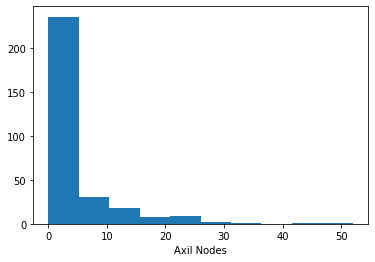

In [88]:
haberman_data['ax'].hist(grid=False)
plt.xlabel('Axil Nodes')

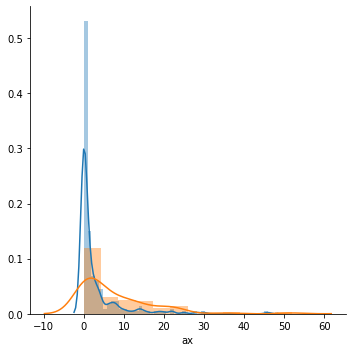

In [91]:
g = sns.FacetGrid(haberman_data,hue='status',height=5,legend_out=True).map(sns.distplot,'ax')


In [40]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survived"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

In [93]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [94]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [95]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [96]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

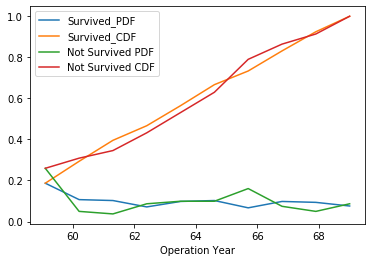

In [97]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The chances of not surviving for people with operation year of less than 60 is higher than their chances of survival

In [98]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [99]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [100]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [101]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

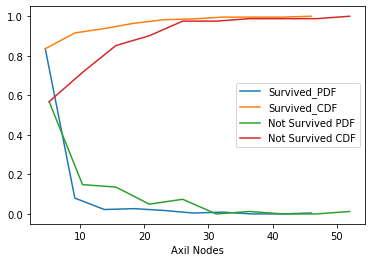

In [102]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***
* The survival chance of Axil Nodes less than 10 is quite high

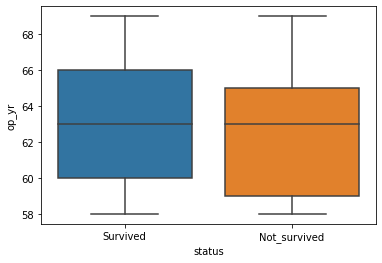

In [142]:
sns.boxplot(y='op_yr',x='status',data=haberman_data)

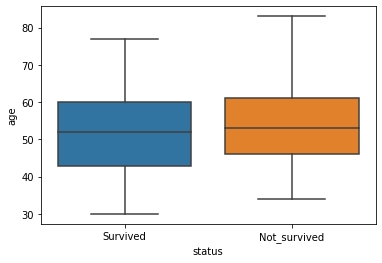

In [143]:
sns.boxplot(y='age',x='status',data=haberman_data)

***Observation :***
* The maximum age of people that survived is a little below 80 and the minimum age is 30 with a median a little above 50
* The minimum age of people that did not survive is about 35 and the maximum is 83 with a median of a little above 50
* The percentage of people that survived is higher than does that didn't survive

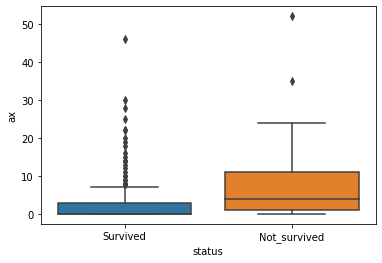

In [144]:
sns.boxplot(y='ax',x='status',data=haberman_data)

***Observation :***
* There are a lot of outliers for People with lesser Axil nodes that Survived
* People with larger number of Axil nodes did not Survive


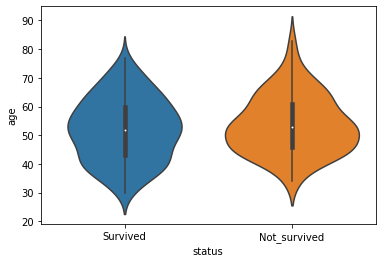

In [145]:
sns.violinplot(y='age',x='status',data=haberman_data)

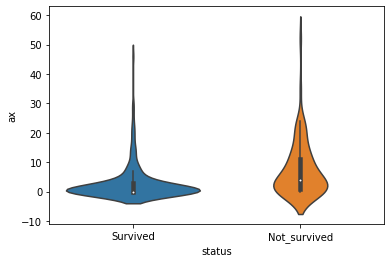

In [146]:
sns.violinplot(y='ax',x='status',data=haberman_data)

12.0

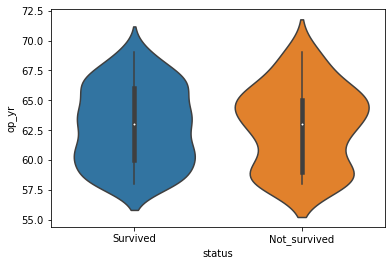

In [56]:
sns.violinplot(y='op_yr',x='status',data=haberman_data)


***Observation :***
* Higher percentage of prople who didn't survive falls between the range of 65 Operation year 
* Higher percentage of prople who survived falls between the range of 60 Operation year 



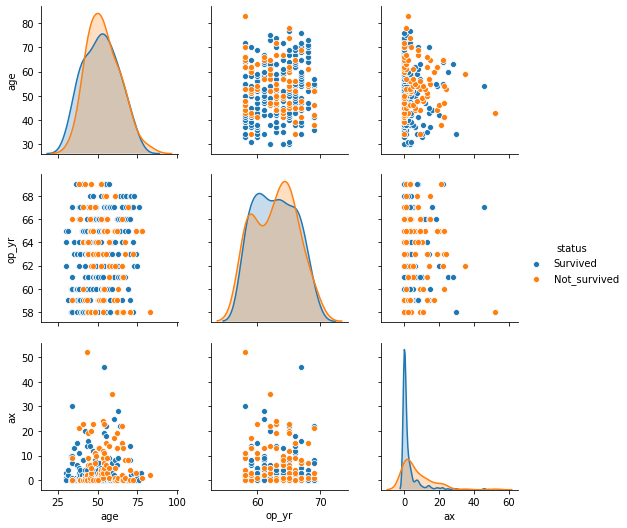

In [151]:
sns.pairplot(haberman_data,hue='status')

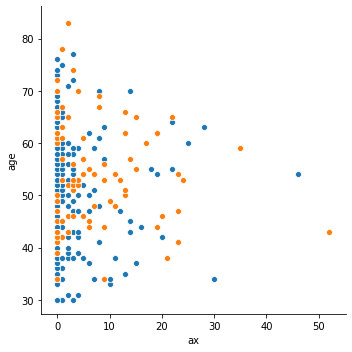

In [87]:
g = sns.FacetGrid(haberman_data,hue='status',height=5,legend_out=True).map(sns.scatterplot,'ax','age')


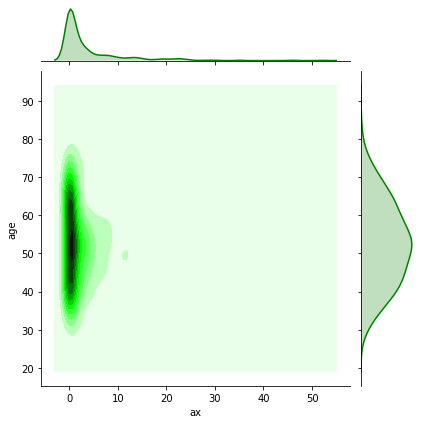

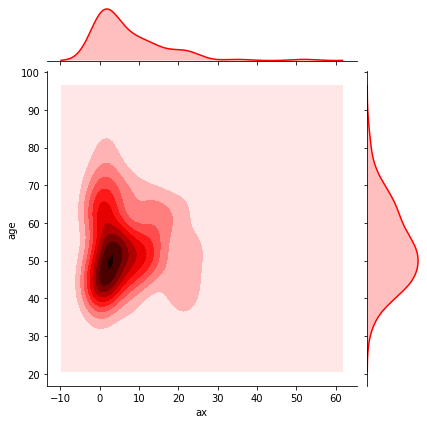

In [83]:
sns.jointplot(x='ax',y='age',data=haberman_data,kind='kde',color='g')

new_data = haberman_data.loc[haberman_data["status"]=="Not_survived"]


sns.jointplot(x='ax',y='age',data=new_data,kind='kde',color='r')

